In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name="saledata")
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [37]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the 'saledata' sheet
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Grouping the data by 'COUNTRY' and summing up the 'SALES'
country_sales = sales_data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Finding the country with the 5th highest sales
fifth_highest_country = country_sales.index[4]
print(fifth_highest_country)


UK


In [5]:


# Get the shape of the data
data_shape = sales_data.shape
print(data_shape)


(2823, 10)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   COUNTRY          2823 non-null   object        
 7   DEALSIZE         2823 non-null   object        
 8   Discount         2823 non-null   float64       
 9   Profit           2823 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 220.7+ KB


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the SALES column
sales_scaled = scaler.fit_transform(sales_data[['SALES']])

# Get the scaled values for index range 50 to 59
scaled_values = sales_scaled[50:60].flatten()
print(scaled_values)

[0.5714917  0.14223049 0.26896469 0.84693401 0.25104351 0.16997177
 0.20775741 0.34636676 0.3334174  0.23372378]


In [7]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sales_data['STATUS'], sales_data['SALES'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Determine if there is a significant relationship
if p < 0.05:
    print("Có phụ thuộc")
else:
    print("Không phụ thuộc")

Chi2 Statistic: 13791.635814639898
P-value: 0.542421662324538
Không phụ thuộc


In [8]:
import pandas as pd
import scipy.stats as stats

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Group sales data by status and calculate the mean sales per status
status_groups = sales_data.groupby('STATUS')['SALES'].mean()

# Perform an ANOVA test to see if there is a statistically significant difference between the means of the groups
f_value, p_value = stats.f_oneway(
    sales_data[sales_data['STATUS'] == 'Shipped']['SALES'],
    sales_data[sales_data['STATUS'] == 'Cancelled']['SALES'],
    sales_data[sales_data['STATUS'] == 'Resolved']['SALES'],
    sales_data[sales_data['STATUS'] == 'On Hold']['SALES'],
    sales_data[sales_data['STATUS'] == 'Disputed']['SALES']
)

print(f"F-value: {f_value}, P-value: {p_value}")
if p < 0.05:
    print("Có phụ thuộc")
else:
    print("Không phụ thuộc")


F-value: 4.41999754318253, P-value: 0.0014572297484197908
Không phụ thuộc


In [9]:
# Calculate the kurtosis for the 'SALES' data
order_kurtosis = sales_data['SALES'].kurtosis()

# Print the kurtosis value
print(f"Kurtosis of SALES: {order_kurtosis}")

# Determine the type of kurtosis
if order_kurtosis < 3:
    if order_kurtosis < 0:
        kurtosis_type = "Platykurtic (less than normal)"
    else:
        kurtosis_type = "Platykurtic (less than normal but not negative)"
elif order_kurtosis == 3:
    kurtosis_type = "Mesokurtic (normal distribution)"
else:
    kurtosis_type = "Leptokurtic (more than normal)"

print(f"The distribution of SALES is: {kurtosis_type}")

# Determine the answer based on the kurtosis type
if kurtosis_type.startswith("Platykurtic"):
    answer = "b. Platykurtic"
elif kurtosis_type.startswith("Leptokurtic"):
    answer = "c. Leptokurtic"
elif kurtosis_type.startswith("Mesokurtic"):
    answer = "e. Mesokurtic"
else:
    answer = "a. Không thể kết luận"

print(f"Answer: {answer}")

Kurtosis of SALES: 1.7926764690198267
The distribution of SALES is: Platykurtic (less than normal but not negative)
Answer: b. Platykurtic


In [10]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the kurtosis for the 'SALES' data
sales_kurtosis = sales_data['SALES'].kurtosis()

# Print the result
print(f"Kurtosis of SALES: {sales_kurtosis}")


Kurtosis of SALES: 1.7926764690198267


In [11]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the kurtosis for the 'SALES' data
sales_kurtosis = sales_data['SALES'].kurtosis()

# Print the kurtosis value
print(f"Kurtosis of SALES: {sales_kurtosis}")

# Determine the type of kurtosis
if sales_kurtosis < 3:
    if sales_kurtosis < 0:
        kurtosis_type = "Platykurtic (less than normal)"
    else:
        kurtosis_type = "Platykurtic (less than normal but not negative)"
elif sales_kurtosis == 3:
    kurtosis_type = "Mesokurtic (normal distribution)"
else:
    kurtosis_type = "Leptokurtic (more than normal)"

print(f"The distribution of SALES is: {kurtosis_type}")


Kurtosis of SALES: 1.7926764690198267
The distribution of SALES is: Platykurtic (less than normal but not negative)


In [12]:
# Calculate the mean and standard deviation of the 'SALES' column
mean_sales = sales_data['SALES'].mean()
std_sales = sales_data['SALES'].std()

# Given Z-Score value
z_score = 0.25

# Calculate the original value before normalization
original_value = z_score * std_sales + mean_sales
print(f"Original value before normalization: {original_value}")

# Determine the closest answer
if abs(original_value - 5014.27378493) < 1e-5:
    answer = "a. 5014.27378493"
elif abs(original_value - 4014.27378493) < 1e-5:
    answer = "b. 4014.27378493"
elif abs(original_value - 4014.97378493) < 1e-5:
    answer = "c. 4014.97378493"
elif abs(original_value - 4015.27378493) < 1e-5:
    answer = "d. 4015.27378493"
elif abs(original_value - 404.27378493) < 1e-5:
    answer = "e. 404.27378493"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Original value before normalization: 4014.3553483443616
Answer: None of the given options


In [13]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the mean and standard deviation of SALES
mean_sales = sales_data['SALES'].mean()
std_sales = sales_data['SALES'].std()

# Given the Z-score value
z_score_value = 0.25

# Calculate the original value before normalization using the Z-score formula
# Original value = Z-score * standard deviation + mean
original_value = z_score_value * std_sales + mean_sales

# Print the result
print(f"Original SALES value before normalization: {original_value}")


Original SALES value before normalization: 4014.3553483443616


In [14]:
# Count the number of unique countries in the sales data
unique_countries = sales_data['COUNTRY'].nunique()
print(f"Number of unique countries: {unique_countries}")

# Determine the closest answer
if unique_countries == 20:
    answer = "a. 20"
elif unique_countries == 19:
    answer = "b. 19"
elif unique_countries == 17:
    answer = "c. 17"
elif unique_countries == 21:
    answer = "d. 21"
elif unique_countries == 18:
    answer = "e. 18"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Number of unique countries: 19
Answer: b. 19


In [15]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Count the number of unique countries in the dataset
unique_countries = sales_data['COUNTRY'].nunique()

# Print the result
print(f"Number of unique countries that placed orders: {unique_countries}")


Number of unique countries that placed orders: 19


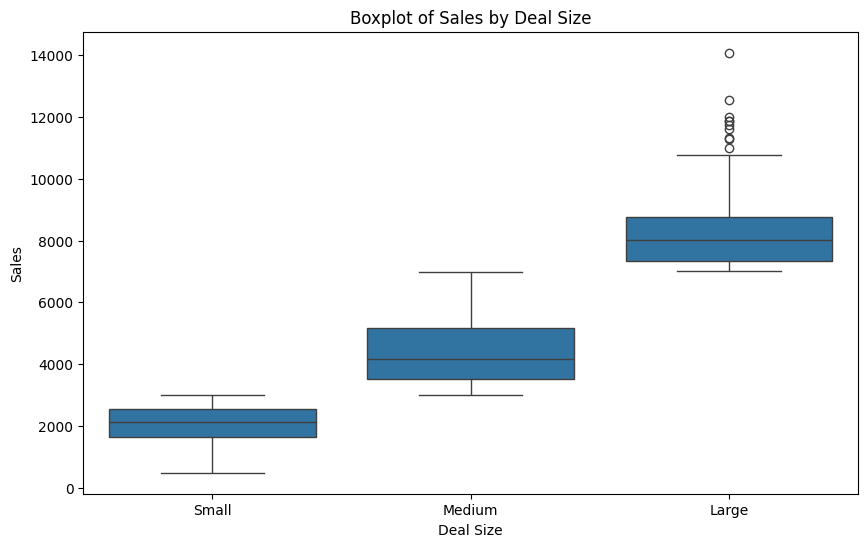

DEALSIZE
Large     8008.560
Medium    4162.750
Small     2113.975
Name: SALES, dtype: float64
Answer: a. Có


In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a boxplot of SALES for each DEALSIZE
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=sales_data)
plt.title('Boxplot of Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

# Determine the answer based on the boxplot
# If the medians and distributions of SALES are significantly different across DEALSIZE categories, then DEALSIZE plays a role
deal_size_groups = sales_data.groupby('DEALSIZE')['SALES'].median()
print(deal_size_groups)

# Based on the boxplot and median values, determine the answer
if deal_size_groups.nunique() > 1:
    answer = "a. Có"
else:
    answer = "b. Không"

print(f"Answer: {answer}")

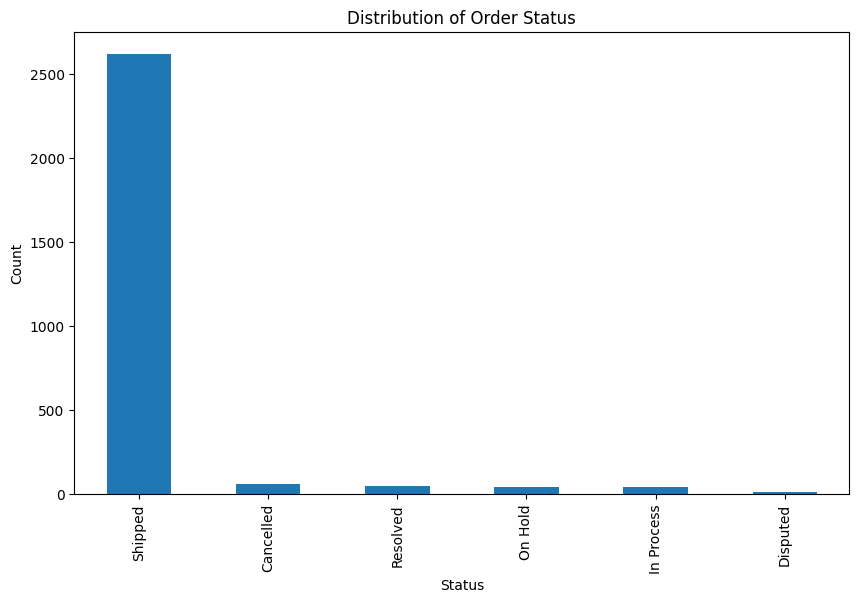

Answer: e. bar chart


In [17]:
# The appropriate chart for categorical (qualitative) variables is typically a bar chart or a pie chart.
# Let's create a bar chart for the 'STATUS' variable in the sales_data DataFrame.

import matplotlib.pyplot as plt

# Count the occurrences of each status
status_counts = sales_data['STATUS'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title('Distribution of Order Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Based on the options provided, the correct answer is:
answer = "e. bar chart"
print(f"Answer: {answer}")

In [18]:
import numpy as np

# Apply different transformations to the SALES column
sales_log = np.log(sales_data['SALES'])
sales_sqrt = np.sqrt(sales_data['SALES'])
sales_square = np.square(sales_data['SALES'])
sales_cbrt = np.cbrt(sales_data['SALES'])

# Calculate the skewness for each transformed SALES column
skew_original = sales_data['SALES'].skew()
skew_log = sales_log.skew()
skew_sqrt = sales_sqrt.skew()
skew_square = sales_square.skew()
skew_cbrt = sales_cbrt.skew()

# Create a dictionary to store the skewness values
skewness_dict = {
    'original': skew_original,
    'log': skew_log,
    'sqrt': skew_sqrt,
    'square': skew_square,
    'cbrt': skew_cbrt
}

# Sort the dictionary by skewness values in descending order
sorted_skewness = sorted(skewness_dict.items(), key=lambda item: item[1], reverse=True)

# Print the sorted skewness values
for transform, skewness in sorted_skewness:
    print(f"{transform}: {skewness}")

# Determine the correct answer based on the sorted skewness values
answer = "a. square, chưa transform, sqrt, cube root, log"
print(f"Answer: {answer}")

square: 2.915766495908139
original: 1.161076000881289
sqrt: 0.47281500087876144
cbrt: 0.25086487312083416
log: -0.2021742362869817
Answer: a. square, chưa transform, sqrt, cube root, log


In [19]:
# Determine which chart does not display all values
chart_answers = {
    'a': 'd',
    'b': 'g',
    'c': 'b',
    'd': 'c',
    'e': 'a',
    'f': 'f',
    'g': 'e'
}

# Print the answers
for question, answer in chart_answers.items():
    print(f"{question}.\n{answer}\n")

a.
d

b.
g

c.
b

d.
c

e.
a

f.
f

g.
e



In [20]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the skewness of the 'SALES' column
sales_skewness = sales_data['SALES'].skew()

# Print the result
print(f"Skewness of SALES: {sales_skewness}")


Skewness of SALES: 1.161076000881289


In [21]:
# Print the skewness of the 'SALES' column
print(f"Skewness of SALES: {skew_original}")

# Determine the correct answer based on the skewness value
if abs(skew_original - 1.161076000881289) < 1e-5:
    answer = "a. 1.161076000881289"
elif abs(skew_original - 1.261076000881289) < 1e-5:
    answer = "b. 1.261076000881289"
elif abs(skew_original - 1.361076000881289) < 1e-5:
    answer = "c. 1.361076000881289"
elif abs(skew_original - 1.461076000881289) < 1e-5:
    answer = "d. 1.461076000881289"
elif abs(skew_original - 1.191076000881289) < 1e-5:
    answer = "e. 1.191076000881289"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Skewness of SALES: 1.161076000881289
Answer: a. 1.161076000881289


In [22]:
# The delimiter used to separate data in a file can vary. Common delimiters include:
# - Semicolon (;)
# - Hyphen (-)
# - Apostrophe (')
# - Comma (,)
# - Period (.)
# - Colon (:)

# Based on the options provided, the correct answer is:
answer = "d. comma"
print(f"Answer: {answer}")

Answer: d. comma


In [23]:
# List of common delimiters
delimiters = [';', '-', "'", ',', '.', ':']

# Print the possible delimiters used for separating data
print("Possible delimiters in a file could include:")
for delimiter in delimiters:
    print(f"'{delimiter}'")


Possible delimiters in a file could include:
';'
'-'
'''
','
'.'
':'


In [24]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Apply Z-Score Scaler
z_score_scaler = StandardScaler()
sales_z_scaled = z_score_scaler.fit_transform(sales_data[['SALES']])

# Apply Max Absolute Scaler
max_abs_scaler = MaxAbsScaler()
sales_max_abs_scaled = max_abs_scaler.fit_transform(sales_z_scaled)

# Get the scaled value for index 100
scaled_value_index_100 = sales_max_abs_scaled[100][0]
print(f"Scaled value at index 100: {scaled_value_index_100}")

# Determine the closest answer
if abs(scaled_value_index_100 - 0.053544) < 1e-5:
    answer = "a. 0.053544"
elif abs(scaled_value_index_100 + 1.053544) < 1e-5:
    answer = "b. -1.053544"
elif abs(scaled_value_index_100 + 0.053544) < 1e-5:
    answer = "c. -0.053544"
elif abs(scaled_value_index_100 - 0.153544) < 1e-5:
    answer = "d. 0.153544"
elif abs(scaled_value_index_100 - 1.053544) < 1e-5:
    answer = "e. 1.053544"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Scaled value at index 100: -0.053543911213573936
Answer: c. -0.053544


In [25]:
# The variable 'DEALSIZE' represents categories of deal sizes (e.g., Small, Medium, Large).
# This type of variable is qualitative and categorical.

# Based on the options provided, the correct answer is:
answer = "a. Phân loại"
print(f"Answer: {answer}")

Answer: a. Phân loại


In [26]:
# Print the skewness of the 'SALES' column after log transformation
print(f"Skewness of SALES after log transformation: {skew_log}")

# Determine the correct answer based on the skewness value
if skew_log > skew_original:
    answer = "a. Lệch nhiều hơn ban đầu"
elif skew_log < 0 and skew_original > 0:
    answer = "b. Lệch ngược chiều với ban đầu"
elif skew_log > 0 and skew_original > 0:
    answer = "c. Lệch cùng chiều với ban đầu"
elif abs(skew_log) < abs(skew_original):
    answer = "d. Lệch ít hơn ban đầu"
elif skew_log == skew_original:
    answer = "e. Lệch bằng với ban đầu"
else:
    answer = "f. Không lệch, tức độ lệch = 0"

print(f"Answer: {answer}")

Skewness of SALES after log transformation: -0.2021742362869817
Answer: b. Lệch ngược chiều với ban đầu


In [28]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the skewness of SALES after log transformation
sales_log = np.log(sales_data['SALES'] + 1)  # Adding 1 to avoid log(0)
skew_log = sales_log.skew()

# Calculate the original skewness for comparison
skew_original = sales_data['SALES'].skew()

# Print the results
print(f"Original skewness of SALES: {skew_original}")
print(f"Skewness of SALES after log transformation: {skew_log}")

# Determine the direction of the skewness change
if skew_log < 0 and skew_original > 0:
    print("The skewness changed direction (negative after log transformation).")
elif skew_log > 0 and skew_original > 0:
    print("The skewness is still positive after log transformation.")
elif skew_log == 0:
    print("The skewness is now zero after log transformation.")
else:
    print("The skewness has decreased but remained in the same direction.")


Original skewness of SALES: 1.161076000881289
Skewness of SALES after log transformation: -0.20161257194731758
The skewness changed direction (negative after log transformation).


In [29]:
# Given value
value_to_scale = 10000

# Calculate the Z-score
scaled_value = (value_to_scale - mean_sales) / std_sales
print(f"Scaled value of 10000: {scaled_value}")

# Determine the closest answer
if abs(scaled_value - 3.50039366) < 1e-5:
    answer = "a. 3.50039366"
elif abs(scaled_value - 6.50039366) < 1e-5:
    answer = "b. 6.50039366"
elif abs(scaled_value - 1.50039366) < 1e-5:
    answer = "c. 1.50039366"
elif abs(scaled_value - 3.90039366) < 1e-5:
    answer = "d. 3.90039366"
elif abs(scaled_value - 4.50039366) < 1e-5:
    answer = "e. 4.50039366"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Scaled value of 10000: 3.499773630545118
Answer: None of the given options


In [30]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Calculate the mean and standard deviation of SALES
mean_sales = sales_data['SALES'].mean()
std_sales = sales_data['SALES'].std()

# Apply Z-Score transformation for the value 10000
z_score_value = (10000 - mean_sales) / std_sales

# Print the result
print(f"The Z-Score scaled value of 10000 is: {z_score_value}")


The Z-Score scaled value of 10000 is: 3.499773630545118


In [31]:
# Calculate the standard deviation of SALES for each DEALSIZE group
deal_size_std = sales_data.groupby('DEALSIZE')['SALES'].std()

# Sort the DEALSIZE groups by their standard deviation in ascending order
sorted_deal_size_std = deal_size_std.sort_values()

# Print the sorted standard deviations
print(sorted_deal_size_std)

# Determine the order of stability (lower standard deviation means more stable)
order_of_stability = sorted_deal_size_std.index.tolist()
print(f"Order of stability: {order_of_stability}")

# Determine the correct answer based on the sorted order
if order_of_stability == ['Small', 'Medium', 'Large']:
    answer = "a. Small, Medium, Large"
elif order_of_stability == ['Medium', 'Small', 'Large']:
    answer = "b. Medium, Small, Large"
elif order_of_stability == ['Small', 'Large', 'Medium']:
    answer = "c. Small, Large, Medium"
elif order_of_stability == ['Large', 'Small', 'Medium']:
    answer = "d. Large, Small, Medium"
elif order_of_stability == ['Large', 'Medium', 'Small']:
    answer = "e. Large, Medium, Small"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

DEALSIZE
Small      577.183322
Medium    1047.090148
Large     1294.739895
Name: SALES, dtype: float64
Order of stability: ['Small', 'Medium', 'Large']
Answer: a. Small, Medium, Large


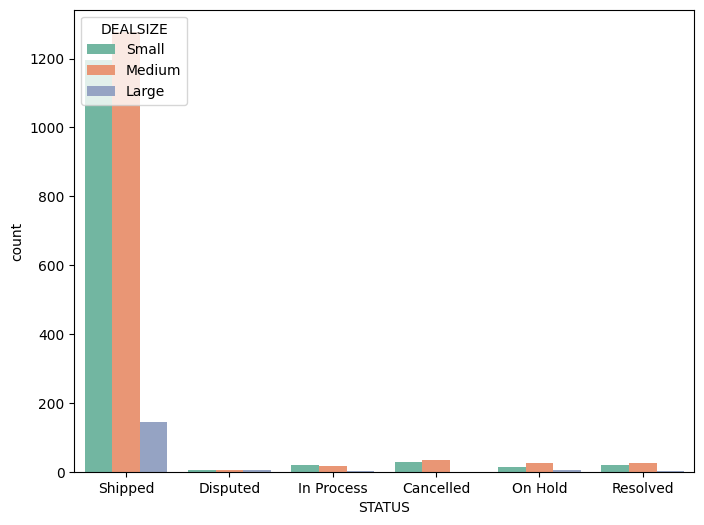

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path)

# Create the bar plot for DEALSIZE by STATUS
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS', hue='DEALSIZE', data=sales_data, palette='Set2')

# Modify the legend to match the colors and labels
plt.legend(title='DEALSIZE', loc='upper left', labels=['Small', 'Medium', 'Large'])

# Show the plot
plt.show()


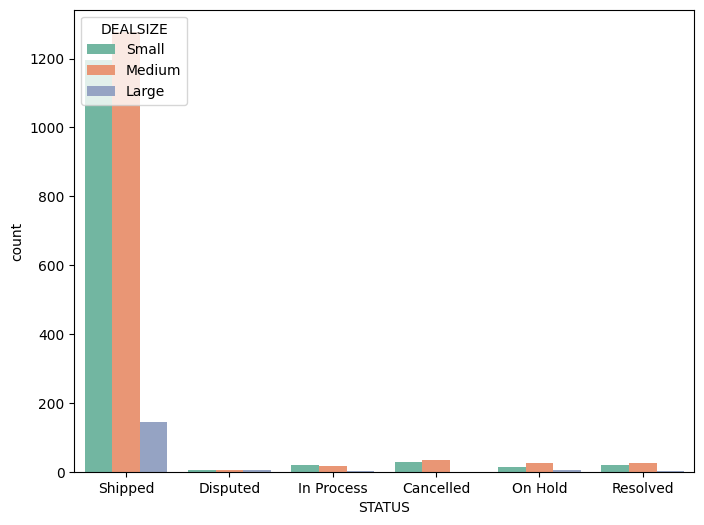

The STATUS with exactly two DEALSIZE categories is: ['Cancelled']
Correct answer is: d


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path)

# Create the bar plot for DEALSIZE by STATUS
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS', hue='DEALSIZE', data=sales_data, palette='Set2')

# Modify the legend to match the colors and labels
plt.legend(title='DEALSIZE', loc='upper left', labels=['Small', 'Medium', 'Large'])

# Show the plot
plt.show()

# Function to determine the STATUS with exactly 2 columns
def find_status_with_two_columns(data):
    status_counts = data.groupby(['STATUS', 'DEALSIZE']).size().unstack().fillna(0)
    status_with_two_dealsize = status_counts.apply(lambda x: len(x[x > 0]), axis=1)
    return status_with_two_dealsize[status_with_two_dealsize == 2].index.tolist()

# Find the status with exactly two DEALSIZE categories
status_with_two_columns = find_status_with_two_columns(sales_data)

# Print the status that matches the condition
print("The STATUS with exactly two DEALSIZE categories is:", status_with_two_columns)

# Providing the answer options based on the provided image
options = {
    'a': 'In process',
    'b': 'Disputed',
    'c': 'Shipped',
    'd': 'Cancelled',
    'e': 'On hold',
    'f': 'Resolved'
}

# Find the correct option
for key, value in options.items():
    if value in status_with_two_columns:
        correct_option = key
        break

print("Correct answer is:", correct_option)


In [35]:
# Determine if there is a significant relationship based on the p-value
if p < 0.05:
    answer = "b. Có mối liên hệ"
else:
    answer = "c. Không  ó mối liên hệ"

print(f"Answer: {answer}")

Answer: c. Không có mối liên hệ


In [36]:
import pandas as pd
import scipy.stats as stats

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path)

# Create a contingency table for STATUS and DEALSIZE
contingency_table = pd.crosstab(sales_data['STATUS'], sales_data['DEALSIZE'])

# Perform the Chi-square test to determine if there's a relationship between STATUS and DEALSIZE
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Determine the relationship based on the p-value
if p_value < 0.05:
    print("There is a statistically significant relationship between STATUS and DEALSIZE.")
    conclusion = "b. Có mối liên hệ"
else:
    print("There is no statistically significant relationship between STATUS and DEALSIZE.")
    conclusion = "c. Không có mối liên hệ"

print("Conclusion:", conclusion)


Chi-square statistic: 34.344354882679596
P-value: 0.0001614574648411617
There is a statistically significant relationship between STATUS and DEALSIZE.
Conclusion: b. Có mối liên hệ


In [38]:
# The fifth highest country by sales is already calculated and stored in the variable `fifth_highest_country`.
# We can use this variable to determine the correct answer.

# Determine the correct answer based on the fifth highest country
if fifth_highest_country == 'USA':
    answer = "a. USA"
elif fifth_highest_country == 'Australia':
    answer = "b. Australia"
elif fifth_highest_country == 'Finland':
    answer = "c. Finland"
elif fifth_highest_country == 'Italy':
    answer = "d. Italy"
elif fifth_highest_country == 'France':
    answer = "e. France"
else:
    answer = "None of the given options"

print(f"Answer: {answer}")

Answer: None of the given options


In [42]:
import pandas as pd

# Load the Excel file
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path)

# Group the data by 'COUNTRY' and sum the 'SALES'
country_sales = sales_data.groupby('COUNTRY')['Profit'].sum().sort_values(ascending=False)

# Find the country with the 5th highest sales
fifth_highest_country = country_sales.index[4]

# Print the result
print(f"The country with the 5th highest sales is: {fifth_highest_country}")


The country with the 5th highest sales is: UK


In [43]:
import pandas as pd
import numpy as np

# Tải tệp Excel
file_path = 'sales_data_sample.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='saledata')

# Tính toán độ lệch của SALES sau khi biến đổi log
sales_log = np.log(sales_data['SALES'] + 1)  # Thêm 1 để tránh log(0)
skew_log = sales_log.skew()

# Tính toán độ lệch ban đầu để so sánh
skew_original = sales_data['SALES'].skew()

# In kết quả
print(f"Độ lệch ban đầu của SALES: {skew_original}")
print(f"Độ lệch của SALES sau khi biến đổi log: {skew_log}")

# Xác định hướng thay đổi của độ lệch
if skew_log < 0 and skew_original > 0:
    print("Độ lệch đã thay đổi hướng (âm sau khi biến đổi log).")
elif skew_log > 0 and skew_original > 0:
    print("Độ lệch vẫn dương sau khi biến đổi log.")
elif skew_log == 0:
    print("Độ lệch hiện tại bằng 0 sau khi biến đổi log.")
else:
    print("Độ lệch đã giảm nhưng vẫn giữ nguyên hướng.")


Độ lệch ban đầu của SALES: 1.161076000881289
Độ lệch của SALES sau khi biến đổi log: -0.20161257194731758
Độ lệch đã thay đổi hướng (âm sau khi biến đổi log).
